In [ ]:
# 矩阵公式
import numpy as np

a = np.array([[1,2,3],[4,5,6]])
print(a)
b = np.array([[1,2],[3,4],[5,6]])
c = np.array([[1,2,3]])
d = np.array([[9,8,7],[3,2,1]])

# 矩阵加法
sum = a + d
print(sum)

#数乘，矩阵乘
e = np.dot(a,b)

#元素乘  矩阵对应位置相乘
e = a * d

# 转置
e = c.T
print(e)
e = np.array([[1,2],[3,4]])

#逆矩阵
result = np.linalg.inv(e)
print(result)
#计算矩阵转行列式的值
result = np.linalg.det(e)
print(result)

#矩阵的秩
e = np.linalg.matrix_rank(d)
print(e)



In [ ]:
import numpy as np
from sympy import symbols,Eq,solve
A = np.array([[3,2,0],[5,4,6],[7,0,1]])
b = np.array([5,12,-7])


inv_a = np.linalg.inv(A)

x = inv_a.dot(b)
y = inv_a @ b
print(x)
print(y)

# d = np.array([[15,1,0,0,14,0],
#                [ 9,3,0,4, 0,2],
#                [ 0,1,1,2, 0,0],
#                [ 0,1,0,1,-7,-2],
#                [ 0,0,0,1, 0,-1]])

# b = np.array([4,15,10,12,1])

# inv_A = np.linalg.inv(d)

# c = inv_A@b
# print(c)

x1,x2,x3,x4,x5,x6 = symbols('x1 x2 x3 x4 x5 x6')

eqs = [
    Eq(15*x1+x2+14*x5,4),
    Eq(9*x1 + 3*x2 + 4*x4 + 2*x6,15),
    Eq(x2 + x3 + 2*x4,10),
    Eq(x2 + x4 - 7*x5 - 2*x6,12),
    Eq(x4 - x6,1)
]

result = solve(eqs,[x1,x2,x3,x4,x5,x6])
print(result)

x,y,z = symbols('x y z')
# 定义方程 逗号右边就是方程的等号右边
eqs = [

    Eq(10*x - y - 2*z ,  72),
    Eq(-x + 10*y - 2*z , 83 ),
    Eq(-x - y + 5*z, 42)
]
result = solve(eqs,[x,y,z])
print(result)





In [ ]:
# 此题求max  c要乘-1 得到的结果fun取相反数

# 求解线性模型的标准形式
import numpy as np
from scipy.optimize import linprog

# 求 max  
c = np.array([2,3,-5]) # z方程,需要求解的方程

#等式方程 等式左边数字  等式右边数字
Aeq =np.array([[1,1,1]])  #等式方程系数矩阵
beq = np.array([7])     #等式方程 等号右边

# 不等式方程
A = np.array([[-2,5,-1],[1,3,1]]) # 不等式方程的系数矩阵
b = np.array([-10,12])            # 不等式方程等号右边

x1,x2,x3 = (0,None),(0,None),(0,None) # 取值范围

# 求解方程求max所以c要乘以-1   不等式方程  等式方程  参数范围            
res = linprog(-c,A,b,Aeq,beq,bounds=(x1,x2,x3))
print(res)


In [ ]:
import numpy as np
from scipy.optimize import linprog

c = np.array([1,2])

A =np.array([[-3,2],[1,1],[1,-1]])
b = np.array([3,2,1])


x1,x2 = (0,None),(0,None)


res = linprog(-c,A,b,bounds=(x1,x2))
print(res)






In [ ]:
import numpy as np
from scipy.optimize import linprog


c = np.array([1,2,0,0,0])
A_eq = np.array([[3,-2,-1,0,0],[-1,-1,0,-1,0],[-1,1,0,0,-1]])

B_eq = np.array([-3,-2,-1])

x1,x2,x3,x4,x5 = (0,None),(0,None),(0,None),(0,None),(0,None)

# 求解方程求max所以c要乘以-1   不等式方程  等式方程  参数范围            
res = linprog(-c,None,None,A_eq,B_eq,bounds=(x1,x2,x3,x4,x5))
print(res)










In [ ]:
from scipy.optimize import minimize  #求解最优解
import numpy as np
import matplotlib.pyplot as plt
def fun(x):
    return (2*x[0]**2 + 3 * x[0] * x[2] - x[1]**2)

def cons(x):

    return (

        {'type':'eq','fun':lambda x : x[0] ** 2 - 2*x[1] + 3 * x[2] - 4},
        {'type':'ineq','fun':lambda x : -x[0] - x[1] + x[2] + 6},
        {'type':'ineq','fun':lambda x : -2*x[0] + x[1] - x[2] + 15}

    )

b1,b2,b3 = (0,None),(0,None),(0,None)
#设置x0猜测值
x0 = np.array((100,200,400))

res = minimize(fun,x0,method='SLSQP',constraints=cons(x0),bounds=(b1,b2,b3))

print(res)




In [ ]:

# 求解0-1整数规划





# mathmodel06_v1.py
# Demo05 of mathematical modeling algorithm
# Solving 0-1 binary programming with PuLP.
# Copyright 2021 Youcans, XUPT
# Crated：2021-06-02
# Python小白的数学建模课 @ Youcans

import pulp      # 导入 pulp 库
# solver_list = pulp.listSolvers()
# solver = pulp.getSolver('GUROBI_CMD')


# 主程序
def main():
    # 投资决策问题：
    # 公司现有 5个拟投资项目，根据投资额、投资收益和限制条件，问如何决策使收益最大。
    """
    问题建模：
        决策变量：
            x1～x5：0/1 变量，1 表示选择第 i 个项目， 0 表示不选择第 i 个项目
        目标函数：
            max fx = 150*x1 + 210*x2 + 60*x3 + 80*x4 + 180*x5
        约束条件：
            210*x1 + 300*x2 + 100*x3 + 130*x4 + 260*x5 <= 600
            x1 + x2 + x3 = 1
            x3 + x4 <= 1
            x5 <= x1
            x1,...,x5 = 0, 1
    """

    #pulp.LpProblem(name='NoName', sense=LpMinimize)

# 其函数的参数为name：在lp文件中写入的问题名称；
# sense：最大或者最小，可为LpMinimize\LpMaximize二者之一。

    InvestLP = pulp.LpProblem("Invest decision problem", sense=pulp.LpMaximize)  # 定义问题，求最大值
    x1 = pulp.LpVariable('x1', cat='Binary')  # 定义 x1，A 项目
    x2 = pulp.LpVariable('x2', cat='Binary')  # 定义 x2，B 项目
    x3 = pulp.LpVariable('x3', cat='Binary')  # 定义 x3，C 项目
    x4 = pulp.LpVariable('x4', cat='Binary')  # 定义 x4，D 项目
    x5 = pulp.LpVariable('x5', cat='Binary')  # 定义 x5，E 项目
    # InvestLP += (150*x1 + 210*x2 + 60*x3 + 80*x4 + 180*x5)  # 设置目标函数 f(x)
    InvestLP += pulp.lpSum(150*x1 + 210*x2 + 60*x3 + 80*x4 + 180*x5)  # 设置目标函数 f(x)
    
    InvestLP += (210*x1 + 300*x2 + 100*x3 + 130*x4 + 260*x5 <= 600)  # 不等式约束
    InvestLP += (x1 + x2 + x3 == 1)  # 等式约束
    InvestLP += (x3 + x4 <= 1)  # 不等式约束
    InvestLP += (x5 - x1 <= 0)  # 不等式约束
    InvestLP.solve()
    print(InvestLP.name)  # 输出求解状态
    print("Status youcans:", pulp.LpStatus[InvestLP.status])  # 输出求解状态
    for v in InvestLP.variables():
        print(v.name, "=", v.varValue)  # 输出每个变量的最优值
    print("Max f(x) =", pulp.value(InvestLP.objective))  # 输出最优解的目标函数值

    return


main()  # Python小白的数学建模课 @ Youcans







In [ ]:
# 混合0-1整数规划

from pulp import *

my_MipProblem = LpProblem("2/2 problem", LpMinimize)

solution = []

# LpInteger 为离散变量 便是为 x1 > 0  x1为整数
x1 = LpVariable("X1", lowBound=0, cat=LpInteger) 
# LpBinary 表示  x2 为0,1变量
x2 = LpVariable("X2", cat=LpBinary)
# cat='Continuous' 表示为连续变量 x3 > 0的连续变量
# pulp.LpVariable('x2', lowBound=0, upBound=7, cat='Continuous')  0<x2<7
# 
x3 = LpVariable("X3", lowBound=0,cat=LpContinuous)

my_MipProblem += 2*x1 + 1*x2 + 2*x3

my_MipProblem += 1*x1 + 2*x2 + 4*x3 >= 8
my_MipProblem += 1*x1 + 1*x2 + 1*x3 == 6

my_MipProblem.solve()
print("Status:", LpStatus[my_MipProblem.status])

for v in my_MipProblem.variables():
    print(v.name, "=", v.varValue)

    solution.append(v.varValue)

print("objective=", value(my_MipProblem.objective))




In [ ]:
# 混合0-1整数规划

from pulp import *

my_MipProblem = LpProblem("2/2 problem", LpMinimize)

solution = []
# 
x1 = LpVariable("X1", lowBound=0, cat=LpInteger)
x2 = LpVariable("X2", cat=LpBinary)
x3 = LpVariable("X3", lowBound=0)

my_MipProblem += 2*x1 + 1*x2 + 2*x3

my_MipProblem += 1*x1 + 2*x2 + 4*x3 >= 8
my_MipProblem += 1*x1 + 1*x2 + 1*x3 == 6

my_MipProblem.solve()
print("Status:", LpStatus[my_MipProblem.status])

for v in my_MipProblem.variables():
    print(v.name, "=", v.varValue)

    solution.append(v.varValue)

# 输出最优解的目标函数值
print("objective=", value(my_MipProblem.objective))



In [ ]:
import matplotlib.pyplot as plt

# 创建一个示例图形
fig, ax = plt.subplots()

# 隐藏上边框线和右边框线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# 设置坐标范围
ax.set_xlim(0,100)
ax.set_ylim(0,100)

# 绘制一些示例数据
x = [0, 50,50,50]
y = [50, 50,50,0]

# 绘制交点
ax.scatter((50),(50), color='blue', marker='o')
ax.text(50 + 0.1, 50+ 0.1, f'Point {1}', fontsize=12)

#设置显示的坐标点 点0和点100
ax.set_xticks([0,100])
ax.set_yticks([0,100])

#设置显示坐标的的内容
custom_xtick_labels = ['0','(100,0)']
custom_ytick_labels = ['0','(0,100)']
#显示坐标的要显示的内容
ax.set_xticklabels(custom_xtick_labels)
ax.set_yticklabels(custom_xtick_labels)

ax.plot(x, y)

# 显示图形
plt.show()

In [ ]:
import networkx as nx

# 定义一个自定义类
class CustomNode:
    def __init__(self, data):
        self.data = data

# 创建一个图
G = nx.Graph()

# 添加自定义节点
node1 = CustomNode("Node A")
node2 = CustomNode("Node B")
node3 = CustomNode("Node C")
print(node1.data)
G.add_node(node1)
G.add_node(node2)
G.add_node(node3)

# 打印图中的节点信息
print("图中的节点：", G.nodes())
for node in G.nodes():
    print(node.data)



In [ ]:
##CVXPY 库的使用

import cvxpy as cp
import numpy  as np
import sys
sys.path.append("E:\Anaconda\Anaconda\Lib\site-packages\cvxopt")
#定义目标向量
c = np.array([70,50,60]) 

#定义约束矩阵 约束变量前面的系数
a = np.array([[2,4,3],[3,1,5],[7,3,5]]) 

#定义约束条件的右边变量
b = np.array([150,160,200]) 

# 定义三个决策变量 pos = True每个约束都是大于0 x1>0 x2>0 x3>0
x = cp.Variable(3,pos = True) 

#  构造目标函数 此时x看成是列向量
# 目标函数最大话
obj = cp.Maximize(c @ x)
 
# 构造约束条件  此时x看成是列向量 
cons = [a @ x <= b]

# 构造问题
prob = cp.Problem(obj,cons)
# 求解问题
# 查看求解器
print(cp.installed_solvers())
# ['ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']
# prob.solve(solver = 'GLPK_MI')
prob.solve(solver = 'GLPK_MI')
print('x的最优解为:',np.round(x.value,4))
print('目标函数的最优解为:',round(prob.value,4))





In [ ]:
import cvxpy as cp
import numpy as np
x = cp.Variable((5,4),pos = True)
obj = cp.Maximize(1.15 * x[3,0] + 1.40*x[1,2]+1.25*x[2,1] + 1.06 * x[4,3])
# obj = cp.Minimize(1.15 * x[3,0] + 1.40*x[1,2]+1.25*x[2,1] + 1.06 * x[4,3])
cons = [

    x[0,0] + x[0,3] == 100000,
    x[1,0] + x[1,2] + x[1,3] == 1.06 * x[0,3],
    x[2,0] + x[2,1] + x[2,3] == 1.15 * x[0,0] + 1.06 * x[1,3],
    x[3,0] + x[3,3] == 1.15 * x[1,0] + 1.06 * x[2,3],
    x[4,3] == 1.115 * x[2,0] + 1.06 * x[2,3],
    x[2,1] <= 40000,x[1,2] <= 30000
]

prob = cp.Problem(obj,cons)
prob.solve(solver = 'GLPK_MI')

print('x的最优解为:',np.round(x.value,4))
print('目标函数的最优解为:',round(prob.value,4))

In [ ]:
###
import cvxpy as cp
import numpy as np
x = cp.Variable((4,4),pos = True)
obj = cp.Minimize(2800 * cp.sum(x[:,0]) + 4500 * cp.sum(x[:-1,1]) + 6000 * cp.sum(x[:2,2])
                  + 7300 * cp.sum(x[0,3]))

cons = [cp.sum(x[0,:])>=15,
        cp.sum(x[0,1:]) + cp.sum(x[2,:3]) >= 10,
        cp.sum(x[0,2:4]) + cp.sum(x[1,1:3]) + cp.sum(x[2,:2])>= 20,
        x[0,3] + x[1,2] + x[2,1] + x[3,0]>=12
        ]

pro = cp.Problem(obj,cons)
prob.solve(solver = 'GLPK_MI')


print('x的最优解为:',x.value)
print('目标函数的最优解为:',prob.value)


In [ ]:
#
import numpy as np
import cvxpy as cp
import pandas as pd
c  = np.array([[6,2,6,7,4,2,5,9],
               [4,9,5,3,8,5,8,2],
               [5,2,1,9,7,4,3,3],
               [7,6,7,3,9,2,7,1],
               [2,3,9,5,7,2,6,5],
               [5,5,2,2,8,1,4,3]])

e = np.array([60,55,51,43,41,52])
d = np.array([35,37,22,32,41,32,43,38])

x = cp.Variable((6,8),pos = True)
# cp.sum(cp.multiply(c,x)) c矩阵和x矩阵对应元素相乘 然后求和
obj = cp.Minimize(cp.sum(cp.multiply(c,x)))
# cp.sum(x,axis=0,keepdims=True) ,axis=0表示每一列求和 keepdims=True表示返回(1,n)这里返回(1,8)
# axis=1 表示行求解 keepdims=True返回 (n,1)这里是(6,1)
con = [cp.sum(x,axis=0,keepdims=True) == d.reshape(1,8), #两个矩阵对应位置相等
       cp.sum(x,axis=1,keepdims=True) <= e.reshape(6,1)] #两个矩阵对应位置 <=

prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print('最优解为:',prob.value)
print('x的取值为',x.value)

xd = pd.DataFrame(x.value)
xd.replace(-0.0, 0.0, inplace=True)
xd





In [ ]:
# 整数规划

import cvxpy as cp

x = cp.Variable(6,integer = True)
obj = cp.Minimize(sum(x))
cons = [
    x[0] + x[5] >= 35,
    x[0] + x[1] >= 40,
    x[1] + x[2] >= 50,
    x[2] + x[3] >= 45,
    x[3] + x[4] >= 55,
    x[4] + x[5] >= 30,
    x >= 0
]

prob = cp.Problem(obj,cons)
prob.solve(solver='GLPK_MI')
print('最优解为:',prob.value)
print('x的取值为',x.value)








In [ ]:
# 0,1规划

import cvxpy as cp
import numpy as np

c = np.array([[15  ,13.8,12.5,11  ,14.3],
             [14.5,14  ,13.2,10.5,15],
             [13.8,13  ,12.8,11.3,14.6],
             [14.7,13.6,13  ,11.6,14]])

x = cp.Variable((4,5),integer = True)
obj = cp.Minimize(cp.sum(cp.multiply(c,x)))

# x  integer = True然后 0 <= x,x <= 1 则得x肯定是0和1了
cons = [
    0 <= x,x <= 1,
    # cp.sum(x,axis=0) 先对列求和得到(5,)矩阵这个矩阵是一维的没有行和列的概念
    # cp.sum(x,axis=0) == 1等价于下面的式子。 (5,) == 1表示(5,)中每个元素都等于1
    # cp.sum(x,axis=0,keepdims=True) == np.array([1,1,1,1,1]).reshape(1,5),
    # cp.sum(x,axis=0) 等价于sum(x) sum(x)是逐列求和
    cp.sum(x,axis=0) == 1,
    # cp.sum(x,axis=1)每行元素相加返回一个一维列表,<= 2表示列表中的每个元素都 <=2
    cp.sum(x,axis=1) <= 2
]

prob = cp.Problem(obj,cons)
prob.solve(solver='GLPK_MI')
print('最优解为:',prob.value)
print('x的取值为',x.value)







In [ ]:
##
import cvxpy as cp
import numpy as np

a = np.array([[9.4888,9.7928,11.5960,11.5643,5.6756,9.8497,9.1756,13.1385,15.4663,15.5464],
              [5.6817,10.3868,3.9294,4.4325,9.9658,17.6632,6.1517,11.8569,8.8721,15.5868]])

d = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        # 距离公式 
        d[i,j] = np.sqrt(np.sum((a[:,i] - a[:,j]) ** 2))

x = cp.Variable(10,integer = True)
y = cp.Variable((10,10),integer = True)
obj = cp.Minimize(cp.sum(x,axis=0))
con = [
    # sum(y) 是逐列求和 等价于cp.sum(x,axis=0)
    # sum(y.T) 相当于对y逐行求和
    cp.sum(y,axis=0) >= 1,cp.sum(y.T,axis=0) <= 5,
    x >= 0,x <= 1, y >= 0,y <= 1
]
for i in range(10):
    con.append(x[i] == y[i,i])
    for j in range(10):
        con.append(d[i,j] * y[i,j] <= 10 * x[i])
        con.append(x[i] >= y[i,j])

prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print('最优解为:',prob.value)
print('x的取值为',x.value)







In [ ]:
import cvxpy as cp
import pylab as plt

c = plt.array([0.005,0.27,0.19,0.185,0.185])
x = cp.Variable(5,pos = True)
aeq = plt.array([1,1.01,1.02,1.045,1.065])
obj = cp.Maximize(c  @ x)

a = 0
aa =[]
Q = []
X =[]
M = 10000
while a < 0.05:
    con = [
        aeq @ x == M,
        0.025 * x[1] <= a * M,
        0.015 * x[2] <= a * M,
        0.055 * x[3] <= a * M,
        0.026 * x[4] <= a * M
    ]

    prob = cp.Problem(obj,con)
    prob.solve(solver = 'GLPK_MI')
    aa.append(a)
    Q.append(prob.value)
    X.append(x.value)
    a = a + 0.001

plt.rc('text',usetex = True)
plt.rc('font',size = 15)
plt.plot(aa,Q,'r*')
plt.xlabel('$a$')
plt.ylabel('$Q$',rotation=0)
plt.show()



In [ ]:
import numpy as np
import cvxpy as cp
import pylab as plt


plt.rc('font',family='SimHei')
plt.rc('font',size =15)

x = cp.Variable(6,pos = True)
r = np.array([0.05,0.28,0.21,0.23,0.25])
p = np.array([0,0.01,0.02,0.045,0.065])
q = np.array([0,0.025,0.015,0.055,0.026])
def LP(w):
    V = [] #风险初始化
    Q = [] # 收益初始化
    X = [] # 最优解的初始化
    con = [(1 + p) @ x[:-1] == 10000]

    for i in range(1,5):
        con.append(q[i] * x[i] <= x[5])
    for i in range(len(w)):
        obj = cp.Minimize(w[i] * x[5] - (1-w[i]) * ((r-p) @ x[:-1]))
        prob = cp.Problem(obj,con)
        prob.solve(solver = 'GLPK_MI') 
        xx = x.value
        V.append(max(q * xx[:-1]))
        Q.append((r-p) @ xx[:-1])
        X.append(xx)
    
    print('w=',w)
    print('v=',np.round(V,2))
    print('Q=',np.round(Q,2))
    plt.figure()
    plt.plot(V,Q,'*-')
    plt.grid('on')
    plt.xlabel('风险(元)')
    plt.ylabel('收益(元)')
    plt.show()
    return X
w1 = np.arange(0,1.1,0.1)
LP(w1)






In [ ]:

# 非线性规划，目标规划
# 简单的问题不需要使用GLPK
# GLPK应用于大规模线性规划和整数规划
import numpy as np
import cvxpy as cp
x = cp.Variable(2,pos = True)
obj = cp.Minimize(sum(x**2) - 4 * x[0] + 4)
con = [-x[0] + x[1] - 2 <= 0,
       x[0] ** 2 - x[1] + 1 <= 0]

prob = cp.Problem(obj,con)
prob.solve(solver = 'ECOS') 

print('最优解为:',round(prob.value,4))
print('x的取值为',np.round(x.value,4))




In [ ]:
import sympy as sp 
import pylab as plt
plt.rc('text',usetex = True)
plt.rc('font',size = 14)

# 定义符号变量
sp.var('x1,x2')
y = (339 - 0.01 * x1 - 0.003 * x2)*x1 + (339-0.004 * x1 - 0.01 * x2) *x2 -(400000 + 195*x1  + 225*x2)
# 化简
y = sp.simplify(y)  
# 求解关于x1,x2的偏导
dy1 = y.diff(x1)
dy2 = y.diff(x2)

s = sp.solve([dy1,dy2],[x1,x2])
x10 = round(float(s[x1]))
x20 = round(float(s[x2]))
print(x10)
# 符号函数代入数值
# 求解得到值
y0 = y.subs({x1:x10,x2:x20})
print(y0)
## 画图
# 符号函数转化为匿名函数
f = sp.lambdify('x1,x2',y,'numpy')
x = plt.linspace(0,10000,100)
#转化为网格数据
X,Y = plt.meshgrid(x,x)
Z = f(X,Y)
# 第一个子窗口三维画图
ax = plt.subplot(121,projection='3d')
ax.plot_surface(X,Y,Z,cmap='viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# 激活第二个子窗口
plt.subplot(122)
contr = plt.contour(X,Y,Z,10)
plt.clabel(contr)
plt.ylabel('$x_2$',rotation=0)
plt.xlabel('$x_1$')

plt.show()











In [ ]:
# 二次规划

# 二次规划

import cvxpy as cp
import numpy as np

c2 = np.array([[-1,-0.15],
               [-0.15,-2]])

c1 = np.array([98,277])
a = np.array([[1,1],
              [1,-2]])


b = np.array([100,0])
x = cp.Variable(2,pos = True)
# obj = cp.Maximize(cp.quad_form(x,c2) + c1 @ x)
obj = cp.Maximize(x @ c2 @ x+ c1 @ x)
con = [a @ x <= b]

prob = cp.Problem(obj,con)
prob.solve(solver = 'ECOS')
# prob是标量 所以可以用round 保留后四位小数
print('最优解为:',round(prob.value,4))
# x是向量所以用np.round 保留后四位小数
print('x的取值为',np.round(x.value,4))











In [ ]:
# 非线性规划
import numpy as np
from scipy.optimize import minimize
c2 = np.array([[-1,-0.15],
               [-0.15,-2]])

c1 = np.array([98,277])
a = np.array([[1,1],
              [1,-2]])

b = np.array([100,0])
obj = lambda x : x @ c2 @ x + c1 @ x
con = {
    'type':'ineq',
    'fun':lambda x : b - a @ x 
}
bd = [(0,np.inf) for i in range(a.shape[1])]

res = minimize(obj,np.random.randn(2),constraints = con,bounds = bd)

print(res)













In [ ]:
# 带绝对值的规划
import cvxpy as cp
import numpy as np

c = np.arange(1,5)
a = np.array([[1,-1,-1,1],
              [1,-1,1,-3],
              [1,-1,-2,3]]) 

b = np.array([0,1,-1/2])

x = cp.Variable(4)

obj = cp.Minimize( c @ cp.abs(x))
# 矩阵与向量相乘 == 另外一个向量
# con = [a @ x == b] 效果一样
con = [a * x == b]
prob = cp.Problem(obj,con)
prob.solve(solver = 'GLPK_MI')
print('最优解为:',prob.value)
print('x最优解为:',x.value)







In [ ]:
# 非线性规划

import numpy as np
from scipy.optimize import minimize

d = np.array([[1.25,8.75,0.5,3.75,3,7.25],
              [1.25,0.75,4.75,5,6.5,7.75],
              [3,5,4,7,6,11]])

a = d[0]
b = d[1]
c = d[2]

e = np.array([20,20])


def obj(xyz):
    x = xyz[:2]
    y = xyz[2:4]
    z = xyz[4:].reshape(6,2)

    obj = 0
    for i in range(6):
        for j in range(2):
            obj = obj + z[i,j] * np.sqrt((x[j] - a[i]) ** 2 + (y[j] - b[i]) ** 2)


    return obj


con = [
     # sum(axis=1) 表示每一行分别求和  矩阵(6,2) sum(axis=1) 变成(6,1) 减去(6,)的向量 
     # j i 是 axis=1
     # eq 是 == 0 
    {'type':'eq','fun':lambda z : z[4:].reshape(6,2).sum(axis=1) - c},
    # ineq（表达式大于等于0）
    # i,j 是axis=0
    {'type':'ineq','fun':lambda z : e - z[4:].reshape(6,2).sum(axis=0)}


]

bd = [(0,np.inf) for i in range(16)]

# 初值取随机向量
res = minimize(obj,np.random.rand(16),constraints=con,bounds=bd)
print(res)
# 提取出最优解的取值 最优解的变量x1,x2,x3....
s = np.round(res.x,4)
print('目标函数的最优值:',round(res.fun,4))
print('x的坐标为',s[:2])
print('y的坐标为',s[2:4])
print('z料场到工地的运输量为',s[4:].reshape(6,2).T)








In [ ]:

# 画出一个8个顶点的3正则图 （每个顶点的度都为3）
import networkx as nx
import pylab as plt

#生成一个3正则图
G = nx.cubical_graph() 
# 激活一号子窗口
plt.subplot(121)
nx.draw(G,with_labels =True)
plt.subplot(122)
# 构建节点的名字
s = ['v' + str(i) for i in range(1,9)]
# 构造顶点标注的字符字典 让 1 与v1 对应起来
s = dict(zip(range(8),s))
# labels = s 改变默认的顶点名字 1->v1
# nx.circular_layout(G)获取每个点的位置坐标
# 根据G的坐标画G G每一个节点的名字对应labels = s   
nx.draw(G,pos = nx.circular_layout(G),labels = s,
        node_color='y',node_shape='s',edge_color='b')
plt.show()
pos = nx.circular_layout(G)
print(pos)










In [ ]:
import networkx as nx
import pylab as plt
G = nx.DiGraph()
List = [
    (1,2),(1,3),(2,3),(3,2),(3,5),(4,2),(4,6),(5,2),(5,4),(6,5)
]
# 必须显示的对顶点赋值 默认的是从0节点开始
G.add_nodes_from(range(1,7))
G.add_edges_from(List)
plt.rc('font',size = 16)
pos = nx.shell_layout(G)
nx.draw(G,pos,with_labels = True,font_weight = 'bold',node_color = 'y')
W = nx.to_numpy_matrix(G)
print(W)
plt.show()




In [ ]:
import networkx as nx
import pylab as plt

import numpy as np
G = nx.Graph()
List = [
    (1,3,10),(1,4,60),(2,3,5),(2,4,20),(3,4,1)
]

G.add_nodes_from(range(1,5))
# 添加权重边
G.add_weighted_edges_from(List)

# 从图中导出邻接矩阵
w1 = nx.to_numpy_matrix(G)

# 获取边的权重 存放在字典里面
w2 = nx.get_edge_attributes(G,'weight')

s = ['v' + str(i) for i in range(1,5)]

s = dict(zip(range(1,5),s))

pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,font_weight='bold',labels = s)

nx.draw_networkx_edge_labels(G,pos,font_size = 13,edge_labels=w2)
print('邻接矩阵为:',w1)
print('邻接表字典为',G.adj)
print('邻接表列表为',list(G.adjacency()))





In [ ]:
import networkx as nx
import pylab as plt

import numpy as np
G = nx.Graph()
List = [
    (1,3,10),(1,4,60),(2,3,5),(2,4,20),(3,4,1)
]

# 添加节点
G.add_nodes_from(range(1,5))
# 添加权重边
G.add_weighted_edges_from(List)

# 从图中导出邻接矩阵
w1 = nx.to_numpy_matrix(G)

# 获取边的权重 存放在字典里面
w2 = nx.get_edge_attributes(G,'weight')

pos = nx.spring_layout(G)
# 画图
nx.draw(G,pos,with_labels=True,font_weight='bold')
# 把图中的权重画出来
nx.draw_networkx_edge_labels(G,pos,font_size = 13,edge_labels=w2)
print('邻接矩阵为:',w1)
print('邻接表字典为',G.adj)
print('邻接表列表为',list(G.adjacency()))





In [ ]:
# 迪杰斯特拉求最短路径
import networkx as nx

G = nx.DiGraph()
List = [
    (1,2,6),(1,3,3),(1,4,1),(2,5,1),(3,2,2),(3,4,2),(4,6,10),(5,4,6),(5,6,4),
    (5,7,3),(5,8,6),(6,5,10),(6,7,2),(7,8,4),(9,5,2),(9,8,3)
]
G.add_nodes_from(range(1,10))
G.add_weighted_edges_from(List)
# 求G图中1->8的最短路径 要考虑权重的因素 
path = nx.dijkstra_path(G,1,8,weight='weight')
# 求G图中1->8的最小权重
d = nx.dijkstra_path_length(G,1,8,weight='weight')
print('最短路径为:',path)
print('最小费用为',d)



In [ ]:
# 求多节点最短路径
import networkx as nx
import numpy as np
G = nx.Graph()
List = [
    (1,3,10),(1,4,60),(2,3,5),(2,4,20),(3,4,1)
]

G.add_nodes_from(range(1,5))

G.add_weighted_edges_from(List)

# 求每个顶点之间的最短距离
d = nx.floyd_warshall_numpy(G)

print('最短距离矩阵为',d)

# 求最短距离的路径 返回的是一个字典
path = nx.shortest_path(G,weight='weight',method='bellman-ford')

for i in range(1,len(d) + 1):
    for j in range(i + 1,len(d) + 1):
        print('顶点{}到顶点{}的最短路劲为:'.format(i,j),path[i][j])









In [ ]:
# 求最短路径，画图标红

import numpy as np
import networkx as nx
import pylab as plt

# 构建有向图矩阵
a = np.zeros((6,6))
#a[0,0] a[1,1]这种位置让他为0就好
# 去掉a[0,0]位置
a[0,1:] = [15,20,27,37,54]
a[1,2:] = [15,20,27,37]
a[2,3:] = [16,21,28]
a[3,4:] = [16,21]
a[4,5] = 17

# 根据矩阵赋值有向图
G = nx.DiGraph(a)
map = dict(zip(range(6),range(1,7)))

#修改顶点编号 0-5 改成1-6
G = nx.relabel_nodes(G,map)

p = nx.shortest_path(G,1,6,weight='weight')

d = nx.shortest_path_length(G,1,6,weight='weight')

print('path=',p) # path= [1, 3, 6]
print('d=',d)
# 设置图的布局
pos = nx.shell_layout(G)
# 获取图中所有的权重,用于画图
w = nx.get_edge_attributes(G,'weight')

# 更改每个节点的名字,用于画图
key = range(1,7)
s = ['v' + str(i) for i in key]
s = dict(zip(key,s))

# 画图
nx.draw(G,pos,font_weight='bold',labels = s , node_color = 'r')
# 把权重画上去
nx.draw_networkx_edge_labels(G,pos,edge_labels = w)

# 构造节点对应关系 path= [1, 3, 6] p[1:] =  [3, 6] 
# zip(p,p[1:]) [(1, 3), (3, 6)] 3个节点画两条边就好
path_edges = list(zip(p,p[1:]))
print(path_edges)#  [(1, 3), (3, 6)]
# 画某一条边 epath_edges=[(1, 3), (3, 6)]里面对应的边
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=3)

plt.show()







In [ ]:
# 最小生成树

import numpy as np
import networkx as nx
import pylab as plt

# 初始化边的信息
L = [
    (0,1,2),(0,2,1),(0,3,3),(0,4,4),(0,5,4),(0,6,2),
    (0,7,5),(0,8,4),(1,2,4),(1,8,1),(2,3,1),(3,4,1),
    (4,5,5),(5,6,2),(6,7,3),(7,8,5)
]

G = nx.Graph()
# 添加边
G.add_weighted_edges_from(L)

# 返回可迭代对象
T = nx.minimum_spanning_tree(G)
# 返回最小生成树的邻接矩阵
c = nx.to_numpy_matrix(T)
print('邻接矩阵c = ',c)
# 求最小生成树的权重
w = c.sum()/2

print('最小生成树的权重W = ',w)
# 给节点特定排布，返回位置信息
pos = nx.circular_layout(G)
# 画连通图
plt.subplot(121)

nx.draw(G,pos,with_labels=True,font_size=13)
# 获取边的信息
w1 = nx.get_edge_attributes(G,'weight')
# 把权重信息画上去
nx.draw_networkx_edge_labels(G,pos,edge_labels=w1)

# 画最小生成树
plt.subplot(122)
nx.draw(T,pos,with_labels=True,font_weight='bold')
w2 = nx.get_edge_attributes(T,'weight')
nx.draw_networkx_edge_labels(T,pos,edge_labels=w2)

plt.show()






In [ ]:
import numpy as np
import cvxpy as cp  

n = 8
x = cp.Variable(n,pos = True)
L = [(1,2,5),(1,3,10),(1,4,11),(2,5,4),
     (3,4,4),(3,5,0),(4,6,15),(5,6,21),
     (5,7,25),(5,8,35),(6,7,0),(6,8,20),
     (7,8,15)]

t = np.zeros((n,n))
# 每个作业最晚可以开始的时间
z = np.zeros(n)

es = np.zeros((n,n))

lf = np.zeros((n,n))
ls = np.zeros((n,n))
ef = np.zeros((n,n))
# 根据边L的连通列表绘制图的邻接矩阵
for i in range(len(L)):
    t[L[i][0] - 1,L[i][1] - 1] = L[i][2]

obj = cp.Minimize(sum(x))
con = []

for k in range(len(L)):
    #接收节点 >= 发出节点 + 权重
    con.append(x[L[k][1]-1]  >= x[L[k][0] -1] + t[L[k][0]-1,L[k][1] - 1])

prob = cp.Problem(obj,con)
prob.solve(solver = 'GLPK_MI')
print('函数最优解为',prob.value)
print('x最优解为',x.value)


xx = x.value

z[-1] = xx[-1]

print(t)

for k in range(n-1,0,-1):
    Ls = [ z[a[1] - 1] - t[k-1,a[1] - 1] for a in L if a[0] == k]
    z[k-1] = min(Ls)



for k in range(1,n):
    Ls = [a for a in L if a[0] == k]
    for a in Ls:
        es[a[0]-1,a[1]-1] = xx[a[0] - 1]
        lf[a[0]-1,a[1]-1] = z[a[1] - 1]
        ls[a[0]-1,a[1]-1] = lf[a[0]-1,a[1]-1] - t[a[0]-1,a[1]-1]
        ef[a[0]-1,a[1]-1] = xx[a[0]-1] + t[a[0] - 1,a[1] - 1]


print('z',z)
esL = [(a[0],a[1],es[a[0]-1,a[1]-1]) for a in L]
lsL = [(a[0],a[1],ls[a[0] - 1,a[1] - 1]) for a in L]



print('作业最早开工时间和最晚开工时间如下:')
print(esL)
print(lsL)







In [ ]:
import cvxpy as cp
import numpy as np
import networkx as nx
import pandas as pd

# 初始化字符节点
s1 = ['S' + str(i) for i in range(1,8)]
s2 = ['A' + str(i) for i in range(1,16)]
s3 = ['B' + str(i) for i in range(1,18)]
L = s1 + s2 + s3

G1 = nx.Graph()
G1.add_nodes_from(L)
L1 = [('B1','B3',450),('B2','B3',80),('B3','B5',1150),
      ('B5','B8',1100),('B4','B6',306),('B6','B7',195),
      ('S1','B7',20),('S1','B8',202),('S2','B8',1200),
      ('B8','B9',720),('S3','B9',690),('B9','B10',520),
      ('B10','B12',170),('S4','B12',690),('S5','B11',462),
      ('B11','B12',88),('B12','B16',160),('B13','B14',70),
      ('B14','B17',290),('B15','B16',160),('S6','B16',70),
      ('B16','B17',290),('S7','B17',30)]
# 根据字符构图
G1.add_weighted_edges_from(L1)
# 求最短距离矩阵
d1 = nx.floyd_warshall_numpy(G1)
# 把矩阵转化为array
d1 = np.array(d1)
# 初始化一个最大值
c1 = np.ones(d1.shape) * np.inf
# pos = nx.circular_layout(G1)
# nx.draw(G1,pos,with_labels=True,font_size=13)
print(d1)

# np 的特殊赋值格式 d1==0的位置 在c1中也等于0
c1[d1 ==0 ] = 0



a = np.array([1,2,10])
b = np.array([5,1,5])







In [ ]:
from scipy.optimize import minimize
import scipy
dir(scipy.optimize)

In [ ]:
# 带绝对值的规划
import cvxpy as cp
import numpy as np

c = np.arange(1,5)
a = np.array([[1,-1,-1,1],
              [1,-1,1,-3],
              [1,-1,-2,3]]) 

b = np.array([0,1,-1/2])

x = cp.Variable(4)

obj = cp.Minimize( c @ cp.abs(x))
# 矩阵与向量相乘 == 另外一个向量
# con = [a @ x == b] 效果一样
con = [a @ x == b]
prob = cp.Problem(obj,con)
prob.solve(solver = 'GLPK_MI')
print('最优解为:',prob.value)
print('x最优解为:',x.value)




In [ ]:
##CVXPY 库的使用

import cvxpy as cp
import numpy  as np
import sys

#定义目标向量
c = np.array([70,50,60]) 

#定义约束矩阵 约束变量前面的系数
a = np.array([[2,4,3],[3,1,5],[7,3,5]]) 

#定义约束条件的右边变量
b = np.array([150,160,200]) 

# 定义三个决策变量 pos = True每个约束都是大于0 x1>0 x2>0 x3>0
x = cp.Variable(3,pos = True) 

#  构造目标函数 此时x看成是列向量
obj = cp.Maximize(c @ x)
 
# 构造约束条件  此时x看成是列向量 
cons = [a @ x <= b]

# 构造问题
prob = cp.Problem(obj,cons)
# 求解问题
# 查看求解器
print(cp.installed_solvers())
# ['ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']
# prob.solve(solver = 'GLPK_MI')
prob.solve(solver = 'ECOS')
print('x的最优解为:',np.round(x.value,4))
print('目标函数的最优解为:',round(prob.value,4))


In [ ]:
###
import cvxpy as cp

x = cp.Variable((4,4),pos = True)
obj = cp.Minimize(2800 * sum(x[:,0]) + 4500 * sum(x[:-1,1]) + 6000 * sum(x[:2,2])
                  + 7300 * x[0,3])

cons = [sum(x[0,:])>=15,
        cp.sum(x[0,1:]) + cp.sum(x[2,:3]) >= 10,
        sum(x[0,2:4]) + sum(x[1,1:3]) + sum(x[2,:2])>= 20,
        x[0,3] + x[1,2] + x[2,1] + x[3,0]>=12
        ]

pro = cp.Problem(obj,cons)
prob.solve(solver = 'GLPK_MI')


print('x的最优解为:',x.value)
print('目标函数的最优解为:',prob.value)


In [ ]:
#
import numpy as np
import cvxpy as cp
import pandas as pd
c  = np.array([[6,2,6,7,4,2,5,9],
               [4,9,5,3,8,5,8,2],
               [5,2,1,9,7,4,3,3],
               [7,6,7,3,9,2,7,1],
               [2,3,9,5,7,2,6,5],
               [5,5,2,2,8,1,4,3]])

e = np.array([60,55,51,43,41,52])
d = np.array([35,37,22,32,41,32,43,38])

x = cp.Variable((6,8),pos = True)
# cp.sum(cp.multiply(c,x)) c矩阵和x矩阵对应元素相乘 然后求和
obj = cp.Minimize(cp.sum(cp.multiply(c,x)))
# cp.sum(x,axis=0,keepdims=True) ,axis=0表示每一列分别求和 keepdims=True表示返回(1,n)这里返回(1,8)
# axis=1 表示每一行分别求和 keepdims=True返回 (n,1)这里是(6,1)
con = [cp.sum(x,axis=0,keepdims=True) == d.reshape(1,8), #两个矩阵对应位置相等
       cp.sum(x,axis=1,keepdims=True) <= e.reshape(6,1)] #两个矩阵对应位置 <=

prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print('最优解为:',prob.value)
print('x的取值为',x.value)

xd = pd.DataFrame(x.value)
xd.replace(-0.0, 0.0, inplace=True)
xd





In [ ]:
##
import cvxpy as cp
import numpy as np

a = np.array([[9.4888,9.7928,11.5960,11.5643,5.6756,9.8497,9.1756,13.1385,15.4663,15.5464],
              [5.6817,10.3868,3.9294,4.4325,9.9658,17.6632,6.1517,11.8569,8.8721,15.5868]])

d = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        # 距离公式 
        d[i,j] = np.sqrt(sum((a[:,i] - a[:,j]) ** 2))

x = cp.Variable(10,integer = True)
y = cp.Variable((10,10),integer = True)
obj = cp.Minimize(sum(x))
con = [
    # sum(y) 是逐列求和 等价于cp.sum(x,axis=0)
    # sum(y.T) 相当于对y逐行求和
    sum(y) >= 1,sum(y.T) <= 5,
    x >= 0,x <= 1, y >= 0,y <= 1
]
for i in range(10):
    con.append(x[i] == y[i,i])
    for j in range(10):
        
        con.append(d[i,j] * y[i,j] <= 10 * x[i])
        con.append(x[i] >= y[i,j])

prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print('最优解为:',prob.value)
print('x的取值为',x.value)







In [ ]:
## 注意 有时候使用sum()求numpy的sum会报错 导入其他线性规划的包时会冲突 
# 所以我们编程时最好使用一个

## 对上面的代码进行下面的修改
import cvxpy as cp
import numpy as np

a = np.array([[9.4888,9.7928,11.5960,11.5643,5.6756,9.8497,9.1756,13.1385,15.4663,15.5464],
              [5.6817,10.3868,3.9294,4.4325,9.9658,17.6632,6.1517,11.8569,8.8721,15.5868]])

d = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        # 距离公式 
        d[i,j] = np.sqrt(np.sum((a[:,i] - a[:,j]) ** 2))

x = cp.Variable(10,integer = True)
y = cp.Variable((10,10),integer = True)
obj = cp.Minimize(cp.sum(x))
con = [
    # sum(y) 是逐列求和 等价于cp.sum(x,axis=0)
    # sum(y.T) 相当于对y逐行求和
    cp.sum(y,axis=0) >= 1,cp.sum(y.T,axis=0) <= 5,
    x >= 0,x <= 1, y >= 0,y <= 1
]
for i in range(10):
    con.append(x[i] == y[i,i])
    for j in range(10):
        con.append(d[i,j] * y[i,j] <= 10 * x[i])
        con.append(x[i] >= y[i,j])

prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print('最优解为:',prob.value)
print('x的取值为',x.value)









In [ ]:
import cvxpy as cp
import pylab as plt

c = plt.array([0.005,0.27,0.19,0.185,0.185])
x = cp.Variable(5,pos = True)
aeq = plt.array([1,1.01,1.02,1.045,1.065])
obj = cp.Maximize(c  @ x)

a = 0
aa =[]
Q = []
X =[]
M = 10000
while a < 0.05:
    con = [
        aeq @ x == M,
        0.025 * x[1] <= a * M,
        0.015 * x[2] <= a * M,
        0.055 * x[3] <= a * M,
        0.026 * x[4] <= a * M
    ]

    prob = cp.Problem(obj,con)
    prob.solve(solver = 'GLPK_MI')
    aa.append(a)
    Q.append(prob.value)
    X.append(x.value)
    a = a + 0.001

plt.rc('text',usetex = True)
plt.rc('font',size = 15)
plt.plot(aa,Q,'r*')
plt.xlabel('$a$')
plt.ylabel('$Q$',rotation=0)
plt.show()


w= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
v= [247.52 247.52 247.52 247.52 247.52 247.52 247.52 247.52  92.25  59.4
   0.  ]
Q= [2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2164.82
 2016.24  500.  ]


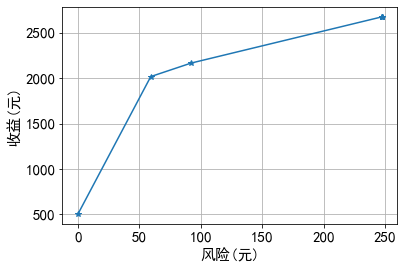

[array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([ 1.93267624e-12,  9.90099010e+03,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  2.47524752e+02]),
 array([   0.        , 3690.03690037, 6150.06150062,   -0.        ,
          -0.        ,   92.25092251]),
 array([   0.   

In [2]:
import numpy as np
import cvxpy as cp
import pylab as plt


plt.rc('font',family='SimHei')
plt.rc('font',size =15)

x = cp.Variable(6,pos = True)
r = np.array([0.05,0.28,0.21,0.23,0.25])
p = np.array([0,0.01,0.02,0.045,0.065])
q = np.array([0,0.025,0.015,0.055,0.026])
def LP(w):
    V = [] #风险初始化
    Q = [] # 收益初始化
    X = [] # 最优解的初始化
    con = [(1 + p) @ x[:-1] == 10000]

    for i in range(1,5):
        con.append(q[i] * x[i] <= x[5])
    for i in range(len(w)):
        obj = cp.Minimize(w[i] * x[5] - (1-w[i]) * ((r-p) @ x[:-1]))
        prob = cp.Problem(obj,con)
        prob.solve(solver = 'GLPK_MI') 
        xx = x.value
        V.append(max(q * xx[:-1]))
        Q.append((r-p) @ xx[:-1])
        X.append(xx)
    
    print('w=',w)
    print('v=',np.round(V,2))
    print('Q=',np.round(Q,2))
    plt.figure()
    plt.plot(V,Q,'*-')
    plt.grid('on')
    plt.xlabel('风险(元)')
    plt.ylabel('收益(元)')
    plt.show()
    return X
w1 = np.arange(0,1.1,0.1)
LP(w1)






w= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
v= [247.52 247.52 247.52 247.52 247.52 247.52 247.52 247.52  92.25  59.4
   0.  ]
Q= [2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2164.82
 2016.24  500.  ]


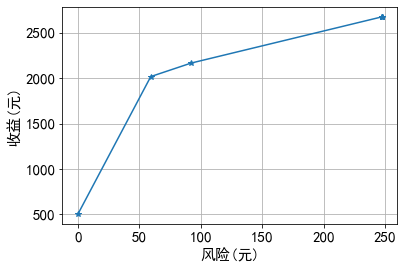

[array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([ 1.93267624e-12,  9.90099010e+03,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  2.47524752e+02]),
 array([   0.        , 3690.03690037, 6150.06150062,   -0.        ,
          -0.        ,   92.25092251]),
 array([   0.   

In [4]:
import numpy as np
import cvxpy as cp
import pylab as plt
import sys
sys.path.append("E:\Anaconda\Anaconda\Lib\site-packages\cvxopt")
plt.rc('font',family='SimHei')
plt.rc('font',size =15)

x = cp.Variable(6,pos = True)
r = np.array([0.05,0.28,0.21,0.23,0.25])
p = np.array([0,0.01,0.02,0.045,0.065])
q = np.array([0,0.025,0.015,0.055,0.026])
def LP(w):
    V = [] #风险初始化
    Q = [] # 收益初始化
    X = [] # 最优解的初始化
    con = [(1 + p) @ x[:-1] == 10000]
    for i in range(1,5):
        con.append(q[i] * x[i] <= x[5])

    for i in range(len(w)):
        obj = cp.Minimize(w[i] * x[5] - (1-w[i]) * ((r-p) @ x[:-1]))
        prob = cp.Problem(obj,con)
        prob.solve(solver = 'GLPK_MI') 
        xx = x.value
        V.append(max(q * xx[:-1]))
        Q.append((r-p) @ xx[:-1])
        X.append(xx)
    
    print('w=',w)
    print('v=',np.round(V,2))
    print('Q=',np.round(Q,2))
    plt.figure()
    plt.plot(V,Q,'*-')
    plt.grid('on')
    plt.xlabel('风险(元)')
    plt.ylabel('收益(元)')
    plt.show()
    return X
w1 = np.arange(0,1.1,0.1)
LP(w1)






In [5]:
import cvxpy as cp
import numpy as np

x = cp.Variable(3,pos = True)
a = np.array([2,1,2])
obj = cp.Minimize(a @ x)
x1 = cp.Variable(integer = True)
x2 = cp.Variable(boolean = True)
cons = [
    cp.sum(x) == 6,
    x[0] + 2 * x[1] + 4*x[2] >= 8,

    x[0] == x1,
    x[1] == x2

]
pro = cp.Problem(obj,cons)


pro.solve(solver = 'GLPK_MI')
print(x.value)
print(pro.value)





[-0.  1.  5.]
11.0


In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50
# 每个点的坐标系 （50，2）
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
# 每两个点的距离 shape(50, 50)
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
# print(points_coordinate)
# print(distance_matrix.shape )
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


from sko.GA import GA_TSP
# size_pop：这是种群的大小 prob_mut：这是变异操作的概率 1%
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()




In [39]:
# pulp大规模矩阵

import numpy as np
import pulp

# 创建一个线性规划问题
problem = pulp.LpProblem("Matrix_Variables", pulp.LpMinimize)
c = np.array([[15  ,13.8,12.5,11  ,14.3],
             [14.5,14  ,13.2,10.5,15],
             [13.8,13  ,12.8,11.3,14.6],
             [14.7,13.6,13  ,11.6,14]])
rows = 4
cols = 5
# 存储变量为二维列表格式
x = []
for i in range(rows):
    # 记录每一行的变量
    x_rowbianlian = []
    for j in range(cols):
        # for 循环定义变量
        X_bianliang = pulp.LpVariable(f'x{i}{j}',cat=pulp.LpInteger,lowBound=0,upBound=1)
        x_rowbianlian.append(X_bianliang)
    # 每一行存进二维列表
    x.append(x_rowbianlian)

# 定义目标函数
obj_fun = 0
for i in range(rows):
    for j in range(cols):
        obj_fun += c[i][j] * x[i][j]

problem += obj_fun


# 定义约束
# 1 列向量分别相加
# for j in range(cols):
#     b = 0
#     for i in range(rows):
#         b += x[i][j]
#     problem += (b == 1)
for j in range(cols):
    problem += pulp.lpSum(x[i][j] for i in range(rows)) == 1

# 2 行向量分别相加
for i in range(rows):
    problem += pulp.lpSum(x[i][j] for j in range(cols)) <= 2

# 求解问题
problem.solve()

# 打印结果
print("状态:", pulp.LpStatus[problem.status])
print("最优解为:", pulp.value(problem.objective))
for i in range(rows):
    for j in range(cols):
        print(f'x{i}{j} = {x[i][j].value()}')




状态: Optimal
最优解为: 63.8
x00 = 0.0
x01 = 0.0
x02 = 1.0
x03 = 0.0
x04 = 0.0
x10 = 0.0
x11 = 0.0
x12 = 0.0
x13 = 1.0
x14 = 0.0
x20 = 1.0
x21 = 1.0
x22 = 0.0
x23 = 0.0
x24 = 0.0
x30 = 0.0
x31 = 0.0
x32 = 0.0
x33 = 0.0
x34 = 1.0


In [37]:
import pulp
import numpy as np

# 创建线性规划问题
problem = pulp.LpProblem("Linear_Programming", pulp.LpMinimize)

# 创建变量
rows, cols = 4, 5
x = []
for i in range(rows):
    x_row = []
    for j in range(cols):
        x_var = pulp.LpVariable(f'x_{i}_{j}', cat=pulp.LpInteger, lowBound=0, upBound=1)
        x_row.append(x_var)
    x.append(x_row)
# 定义目标函数
c = np.array([[15, 13.8, 12.5, 11, 14.3],
              [14.5, 14, 13.2, 10.5, 15],
              [13.8, 13, 12.8, 11.3, 14.6],
              [14.7, 13.6, 13, 11.6, 14]])
objective = 0
for i in range(rows):
    for j in range(cols):
        objective += c[i][j] * x[i][j]
problem += objective

# 定义约束条件
for j in range(cols):
    problem += pulp.lpSum(x[i][j] for i in range(rows)) == 1
for i in range(rows):
    problem += pulp.lpSum(x[i][j] for j in range(cols)) <= 2

# 求解线性规划问题
problem.solve()

# 打印结果
print("状态:", pulp.LpStatus[problem.status])
print("最优解为:", pulp.value(problem.objective))
for i in range(rows):
    for j in range(cols):
        print(f'x_{i}_{j} = {x[i][j].value()}')

状态: Optimal
最优解为: 63.8
x_0_0 = 0.0
x_0_1 = 0.0
x_0_2 = 1.0
x_0_3 = 0.0
x_0_4 = 0.0
x_1_0 = 0.0
x_1_1 = 0.0
x_1_2 = 0.0
x_1_3 = 1.0
x_1_4 = 0.0
x_2_0 = 1.0
x_2_1 = 1.0
x_2_2 = 0.0
x_2_3 = 0.0
x_2_4 = 0.0
x_3_0 = 0.0
x_3_1 = 0.0
x_3_2 = 0.0
x_3_3 = 0.0
x_3_4 = 1.0


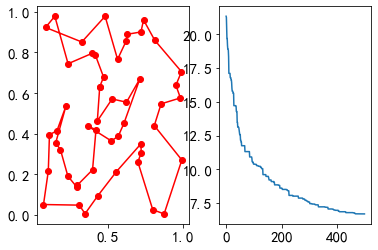

In [40]:

#遗传算法求解图的问题
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50
# 每个点的坐标系
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
# 每两个点的距离 shape(50, 50)
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
# print(points_coordinate)
# print(distance_matrix.shape )
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


from sko.GA import GA_TSP
# size_pop：这是种群的大小 prob_mut：这是变异操作的概率 1%
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()


In [44]:
# 非线性规划

import numpy as np
from scipy.optimize import minimize

d = np.array([[1.25,8.75,0.5,3.75,3,7.25],
              [1.25,0.75,4.75,5,6.5,7.75],
              [3,5,4,7,6,11]])

a = d[0]
b = d[1]
c = d[2]

e = np.array([20,20])


def obj(xyz):
    x = xyz[:2]
    y = xyz[2:4]
    z = xyz[4:].reshape(6,2)
    # print(z.sum(axis=1).shape)
    obj = 0
    for i in range(6):
        for j in range(2):
            obj = obj + z[i,j] * np.sqrt((x[j] - a[i]) ** 2 + (y[j] - b[i]) ** 2)


    return obj


con = [
     # sum(axis=1) 表示每一行分别求和  矩阵(6,2) sum(axis=1) 变成(6,1) 减去(6,)的向量 
     # j i 是 axis=1
     # eq 是 == 0 
    {'type':'eq','fun':lambda z : z[4:].reshape(6,2).sum(axis=1) - c},
    # ineq（表达式大于等于0）
    # i,j 是axis=0
    {'type':'ineq','fun':lambda z : e - z[4:].reshape(6,2).sum(axis=0)}


]

bd = [(0,np.inf) for i in range(16)]

res = minimize(obj,np.random.rand(16),constraints=con,bounds=bd)
print(res)
# 提取出最优解的取值 最优解的变量x1,x2,x3....
s = np.round(res.x,4)
print('目标函数的最优值:',round(res.fun,4))
print('x的坐标为',s[:2])
print('y的坐标为',s[2:4])
print('z料场到工地的运输量为',s[4:].reshape(6,2).T)








(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
